## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.datasets import cifar10

## Load Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 [==============================] - 6s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

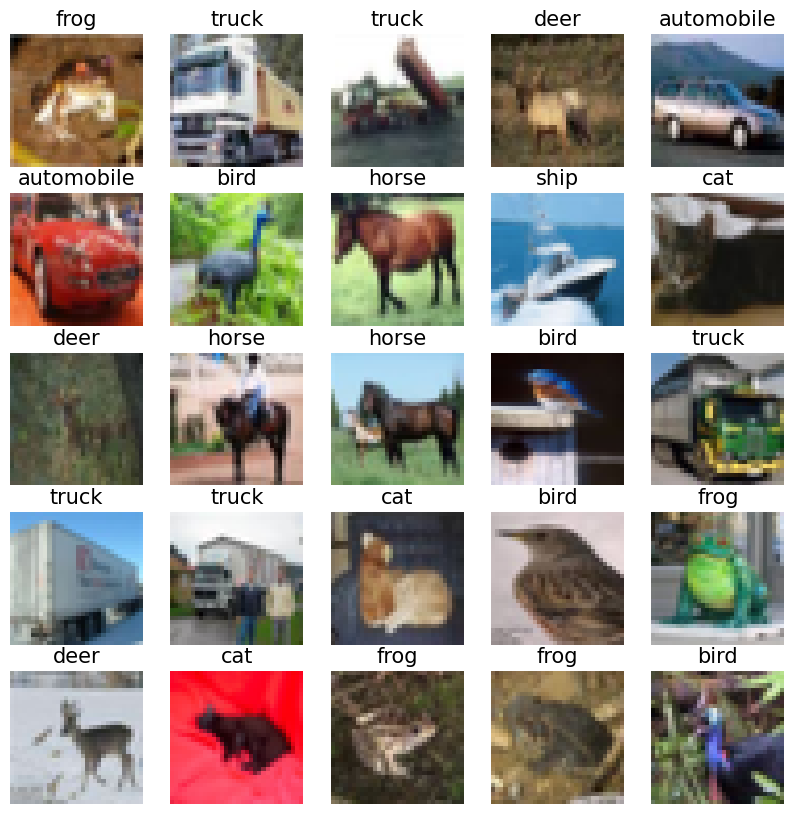

In [4]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.title(labels[y_train[i][0]], fontsize = 15)
    plt.axis('off')

In [5]:
## Normalization
X_train = X_train/255
X_test = X_test/255

## Build model

In [8]:
model = Sequential()
model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 input_shape = (32,32,3),
                 activation = 'relu')) ##26*26*32
model.add(MaxPool2D(pool_size = (2,2))) ##13*13*32
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 activation = 'relu')) ##11*11*32
model.add(MaxPool2D(pool_size = (2,2))) ##5*5*64

model.add(Flatten())
model.add(Dense(320, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

In [9]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

history = model.fit(X_train, y_train,  batch_size=10, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 27s 5ms/step - loss: 1.3956 - accuracy: 0.4937 - val_loss: 1.0932 - val_accuracy: 0.6195
Epoch 2/10
5000/5000 [==============================] - 21s 4ms/step - loss: 1.0419 - accuracy: 0.6341 - val_loss: 1.0149 - val_accuracy: 0.6455
Epoch 3/10
5000/5000 [==============================] - 21s 4ms/step - loss: 0.8925 - accuracy: 0.6868 - val_loss: 0.9635 - val_accuracy: 0.6732
Epoch 4/10
5000/5000 [==============================] - 22s 4ms/step - loss: 0.7838 - accuracy: 0.7262 - val_loss: 0.9675 - val_accuracy: 0.6816
Epoch 5/10
5000/5000 [==============================] - 21s 4ms/step - loss: 0.6983 - accuracy: 0.7555 - val_loss: 0.9177 - val_accuracy: 0.6960
Epoch 6/10
5000/5000 [==============================] - 22s 4ms/step - loss: 0.6240 - accuracy: 0.7808 - val_loss: 0.9752 - val_accuracy: 0.6850
Epoch 7/10
5000/5000 [==============================] - 22s 4ms/step - loss: 0.5575 - accuracy: 0.8016 - val_loss: 1.0310 - val_ac

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1557 - accuracy: 0.6861


[1.1557018756866455, 0.6861000061035156]

### Unseen data from internet daved at datasets/cifar_pred path

1/1 [==============================] - 0s 340ms/step
Prediction :  airplane


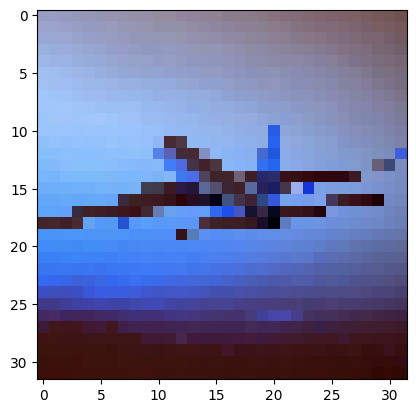

In [17]:
import cv2
img= cv2.imread('Datasets/cifar_pred/1.jpg')
img_resized = cv2.resize(img,(32,32))
plt.imshow(img_resized)
img_resized= img_resized/255
img_resized = img_resized.reshape(-1,32,32,3)
print("Prediction : ",labels[np.argmax(model.predict(img_resized))])

1/1 [==============================] - 0s 25ms/step
Prediction :  automobile


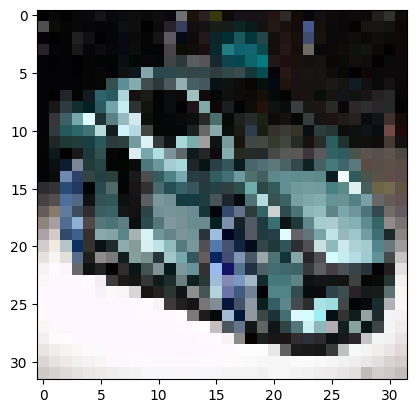

In [18]:
img= cv2.imread('Datasets/cifar_pred/2.jpg')
img_resized = cv2.resize(img,(32,32))
plt.imshow(img_resized)
img_resized= img_resized/255
img_resized = img_resized.reshape(-1,32,32,3)
print("Prediction : ",labels[np.argmax(model.predict(img_resized))])

1/1 [==============================] - 0s 27ms/step
Prediction :  airplane


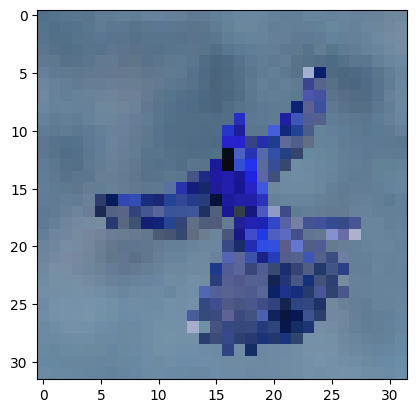

In [19]:
img= cv2.imread('Datasets/cifar_pred/3.jpg')
img_resized = cv2.resize(img,(32,32))
plt.imshow(img_resized)
img_resized= img_resized/255
img_resized = img_resized.reshape(-1,32,32,3)
print("Prediction : ",labels[np.argmax(model.predict(img_resized))])

1/1 [==============================] - 0s 28ms/step
Prediction :  cat


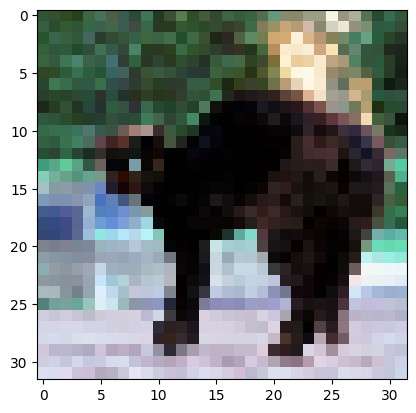

In [20]:
img= cv2.imread('Datasets/cifar_pred/4.jpg')
img_resized = cv2.resize(img,(32,32))
plt.imshow(img_resized)
img_resized= img_resized/255
img_resized = img_resized.reshape(-1,32,32,3)
print("Prediction : ",labels[np.argmax(model.predict(img_resized))])

1/1 [==============================] - 0s 26ms/step
Prediction :  truck


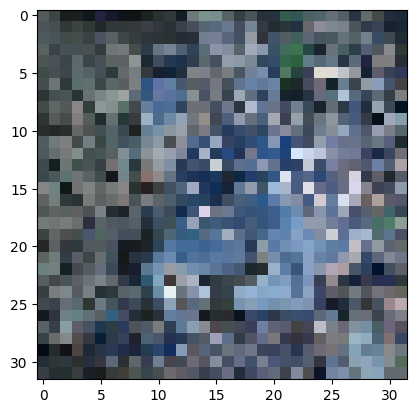

In [22]:
img= cv2.imread('Datasets/cifar_pred/5.jpg')
img_resized = cv2.resize(img,(32,32))
plt.imshow(img_resized)
img_resized= img_resized/255
img_resized = img_resized.reshape(-1,32,32,3)
print("Prediction : ",labels[np.argmax(model.predict(img_resized))])

1/1 [==============================] - 0s 19ms/step
Prediction :  ship


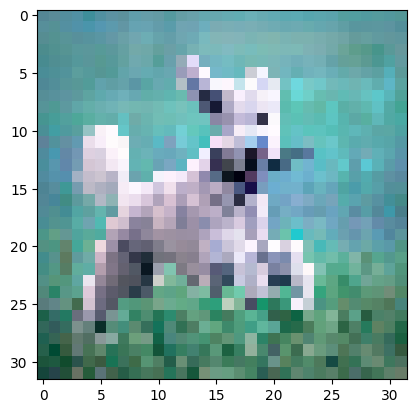

In [23]:
img= cv2.imread('Datasets/cifar_pred/6.jpg')
img_resized = cv2.resize(img,(32,32))
plt.imshow(img_resized)
img_resized= img_resized/255
img_resized = img_resized.reshape(-1,32,32,3)
print("Prediction : ",labels[np.argmax(model.predict(img_resized))])

1/1 [==============================] - 0s 27ms/step
Prediction :  frog


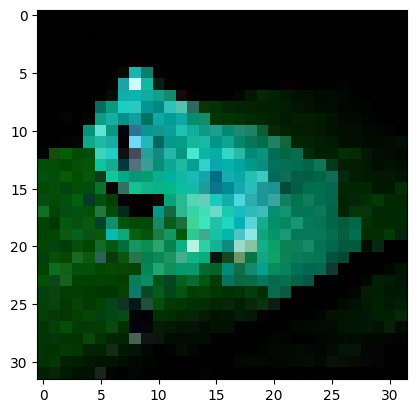

In [24]:
img= cv2.imread('Datasets/cifar_pred/7.jpg')
img_resized = cv2.resize(img,(32,32))
plt.imshow(img_resized)
img_resized= img_resized/255
img_resized = img_resized.reshape(-1,32,32,3)
print("Prediction : ",labels[np.argmax(model.predict(img_resized))])

1/1 [==============================] - 0s 30ms/step
Prediction :  cat


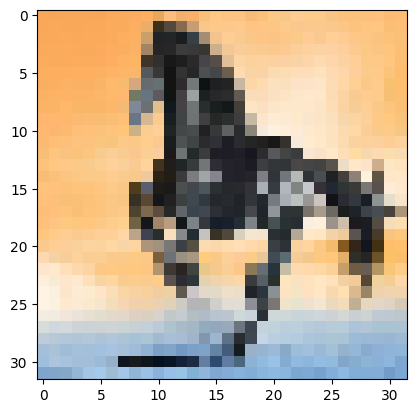

In [25]:
img= cv2.imread('Datasets/cifar_pred/8.jpg')
img_resized = cv2.resize(img,(32,32))
plt.imshow(img_resized)
img_resized= img_resized/255
img_resized = img_resized.reshape(-1,32,32,3)
print("Prediction : ",labels[np.argmax(model.predict(img_resized))])

1/1 [==============================] - 0s 39ms/step
Prediction :  cat


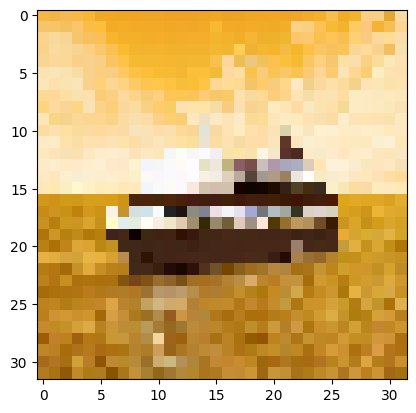

In [26]:
img= cv2.imread('Datasets/cifar_pred/9.jpg')
img_resized = cv2.resize(img,(32,32))
plt.imshow(img_resized)
img_resized= img_resized/255
img_resized = img_resized.reshape(-1,32,32,3)
print("Prediction : ",labels[np.argmax(model.predict(img_resized))])

1/1 [==============================] - 0s 116ms/step
Prediction :  truck


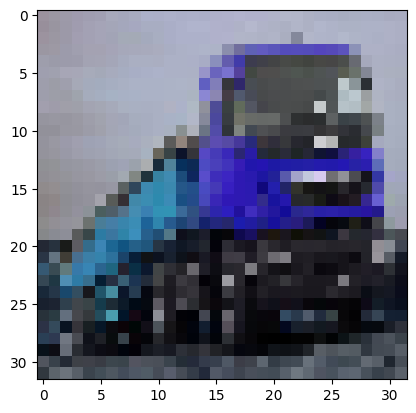

In [27]:
img= cv2.imread('Datasets/cifar_pred/10.jpg')
img_resized = cv2.resize(img,(32,32))
plt.imshow(img_resized)
img_resized= img_resized/255
img_resized = img_resized.reshape(-1,32,32,3)
print("Prediction : ",labels[np.argmax(model.predict(img_resized))])